# Data Modeling D208 - Multiple Linear Regression
---

## Overview
We will review a telecom churn dataset and develop a predictive model using Multiple Linear Regression.  This dataset contains 10,000 records of telecom customers with various datapoints.
<br><br>
The usual focus is on churn (whether or not a customer leaves), but we will be focusing on a continuous variable instead.  This will be more appropriate to demonstrate Multiple Linear Regression.
<br><br>
Our focus will be on the bandwidth usage of the customers.  If we can predict that, we could either A) focus on bringing in new customers that would use less data or B) know when we need to expand our infrastructure to handle new usage demands.
<br><br>
Multiple regression is helpful when trying to predict the value of a dependent (target) continuous variable based on two or more independent variables.  It also allows us to use varying weights on each independent variables, so they have different levels of impact on the dependent variable predictions.
<br><br>

## Objectives & Goals
We will look for variables that show correlation with data usage and then perform analysis to determine if we can predict usage for new or potential customers.  We will split the dataset into train and test segments so we can test the level of success.
<br><br>
Primary assumptions of multiple regression models -
- The dependent variable is continuous
- Variables being used have a normal distribution
- An assumption of a linear relationship between the outcome and predictor variables
- The variance of error terms is similar across variables (Homoscedasticity)
- Indepenent variables involved do not have a high level of correlation (Multicollinearity)
<br><br>
My goal during will be developing a clean dataset that contains relevant variables, develop the model, and describe the results.  
<br><br>

## Plan
I will be using Python for my analysis.  There are many benefits of using Python for data science, including but not limited to -
- It is possible to use Python for full application development, so the project can always be expanded or integrated into other Python projects
- The pandas dataframe and its methods make dealing with tabular data very straightforward
- The syntax of Python feels closer to other programming languages than R, and that makes it easier for me to understand
- Python is a relatively easy language to pick up
- Other libraries including MatPlotLib, NumPy, and SciKitLearn offer vast support for operations involving data analysis and data science

<br><br>
I will use the following steps during this analysis -
1. Examine the dataset
2. Determine the intial set of variables I want to use
3. Change any qualitive variables into quantitive form
4. Normalize any variables (only if necessary)
4. Inspect for outliers and distributions
5. Determine a course of action if there are excessive or special case outliers that might need removal
6. Execute the model
7. Re-evaluate variables included
8. Re-execute the model (only if variables were removed)
9. Describe the resulting correlation (could be R or R2, algrebraic equation that describes the relationship, or any other relevant information discovered)
<br><br>

---
## Exploratory Data Analysis
### Review the dataset and remove/transform variables

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

It looks like all the values are non-null, so this is a complete dataset and we should not need to remove empty records.
<br><br>
Next, I will to remove variables that either have no relevance to bandwith, cannot be converted to a scaled quantitive value, or might have an obvious correlation but not be helpful when looking at new customers.


In [2]:
df.drop(columns=['Lat','Lng','Area','Outage_sec_perweek','Contacts','CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','TimeZone','Job','Churn','Contract','PaymentMethod','Tenure','MonthlyCharge','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], inplace=True)
df.sample(10)

,Population,Children,Age,Income,Marital,Gender,Email,Yearly_equip_failure,Techie,Port_modem,...,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Bandwidth_GB_Year
2735,190,1,84,7858.21,Divorced,Male,7,0,No,Yes,...,Yes,No,No,No,No,No,Yes,No,No,807.017603
9775,1038,0,51,9568.37,Separated,Female,12,1,No,No,...,No,No,No,No,No,Yes,Yes,No,Yes,6090.325352
33,136,5,74,25942.10,Separated,Male,8,1,No,No,...,Yes,Yes,Yes,Yes,No,No,Yes,No,No,2680.762173
6362,26683,3,48,47312.43,Widowed,Female,10,0,No,Yes,...,Yes,No,Yes,No,No,No,No,Yes,Yes,5311.260793
5267,5148,1,64,8937.69,Divorced,Male,13,0,No,No,...,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,4735.276139
6030,1034,2,36,46932.29,Widowed,Nonbinary,8,0,Yes,No,...,Yes,No,No,No,Yes,No,Yes,No,Yes,6000.793836
2158,4705,0,51,44034.11,Married,Female,9,0,Yes,Yes,...,Yes,Yes,No,No,No,No,Yes,Yes,No,753.467725
9443,759,2,84,58578.06,Divorced,Female,10,0,No,No,...,Yes,No,No,No,No,No,Yes,Yes,No,4728.350252
823,4102,3,64,47300.07,Married,Female,16,2,No,No,...,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,1094.729266
7583,426,3,62,3167.88,Divorced,Female,16,0,No,No,...,Yes,Yes,No,No,Yes,No,No,No,Yes,3459.851822


Next, we need to convert the categorical columns into numeric values so the model can include them.

In [3]:
df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [4]:
# create a list of conditions
conditions = [(df['Marital'] == "Divorced")
            , (df['Marital'] == "Widowed")
            , (df['Marital'] == "Separated")
            , (df['Marital'] == "Never Married")
            , (df['Marital'] == "Married")]
# create a list of the values
values = [1,2,3,4,5]

df['MaritalClass'] = np.select(conditions, values)
df.MaritalClass.value_counts()

1    2092
2    2027
3    2014
4    1956
5    1911
Name: MaritalClass, dtype: int64

In [5]:
df.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [6]:
# create a list of conditions
conditions = [(df['Gender'] == "Female")
            , (df['Gender'] == "Male")
            , (df['Gender'] == "Nonbinary")]
# create a list of the values
values = [1,2,3]

df['GenderClass'] = np.select(conditions, values)
df.GenderClass.value_counts()

1    5025
2    4744
3     231
Name: GenderClass, dtype: int64

In [7]:
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [8]:
# create a list of conditions
conditions = [(df['InternetService'] == "Fiber Optic")
            , (df['InternetService'] == "DSL")
            , (df['InternetService'] == "None")]
# create a list of the values
values = [1,2,3]

df['InternetServiceClass'] = np.select(conditions, values)
df.InternetServiceClass.value_counts()

1    4408
2    3463
3    2129
Name: InternetServiceClass, dtype: int64

In [9]:
# handle all yes/no variables
# create a list of the values

def convertBinaryField(df, fieldName):
  conditions = [(df[fieldName] == "Yes")
              , (df[fieldName] == "No")]
  values = (0,1)
  df[fieldName + 'Class'] = np.select(conditions, values)

convertBinaryField(df, 'Techie')
convertBinaryField(df, 'Port_modem')
convertBinaryField(df, 'Tablet')
convertBinaryField(df, 'Phone')
convertBinaryField(df, 'Multiple')
convertBinaryField(df, 'OnlineSecurity')
convertBinaryField(df, 'OnlineBackup')
convertBinaryField(df, 'DeviceProtection')
convertBinaryField(df, 'TechSupport')
convertBinaryField(df, 'StreamingTV')
convertBinaryField(df, 'StreamingMovies')
convertBinaryField(df, 'PaperlessBilling')

In [10]:
df.drop(columns=['Marital','Gender','InternetService','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling'], inplace=True)

In [11]:
df.head()

,Population,Children,Age,Income,Email,Yearly_equip_failure,Bandwidth_GB_Year,MaritalClass,GenderClass,InternetServiceClass,...,TabletClass,PhoneClass,MultipleClass,OnlineSecurityClass,OnlineBackupClass,DeviceProtectionClass,TechSupportClass,StreamingTVClass,StreamingMoviesClass,PaperlessBillingClass
0,38,0,68,28561.99,10,1,904.536110,2,2,1,...,0,0,1,0,0,1,1,1,0,0
1,10446,1,27,21704.77,12,1,800.982766,5,1,1,...,0,0,0,0,1,1,1,0,0,0
2,3735,4,50,9609.57,9,1,2054.706961,2,1,2,...,1,0,0,1,1,1,1,1,0,0
3,13863,1,48,18925.23,15,0,2164.579412,5,2,2,...,1,0,1,0,1,1,1,0,1,0
4,11352,0,83,40074.19,16,1,271.493436,3,2,1,...,1,1,1,1,1,1,0,0,1,1


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.00000
Children,10000.0,2.087700,2.147200,0.000000,0.000000,1.000000,3.000000,10.00000
Age,10000.0,53.078400,20.698882,18.000000,35.000000,53.000000,71.000000,89.00000
Income,10000.0,39806.926771,28199.916702,348.670000,19224.717500,33170.605000,53246.170000,258900.70000
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.00000
Yearly_equip_failure,10000.0,0.398000,0.635953,0.000000,0.000000,0.000000,1.000000,6.00000
Bandwidth_GB_Year,10000.0,3392.341550,2185.294852,155.506715,1236.470827,3279.536903,5586.141369,7158.98153
MaritalClass,10000.0,2.956700,1.413444,1.000000,2.000000,3.000000,4.000000,5.00000
GenderClass,10000.0,1.520600,0.543880,1.000000,1.000000,1.000000,2.000000,3.00000
InternetServiceClass,10000.0,1.772100,0.775772,1.000000,1.000000,2.000000,2.000000,3.00000


We will look at an overview of some of the relationships between the more continuous variables.  This view also shows the distribution of each variable (down the diagonal).

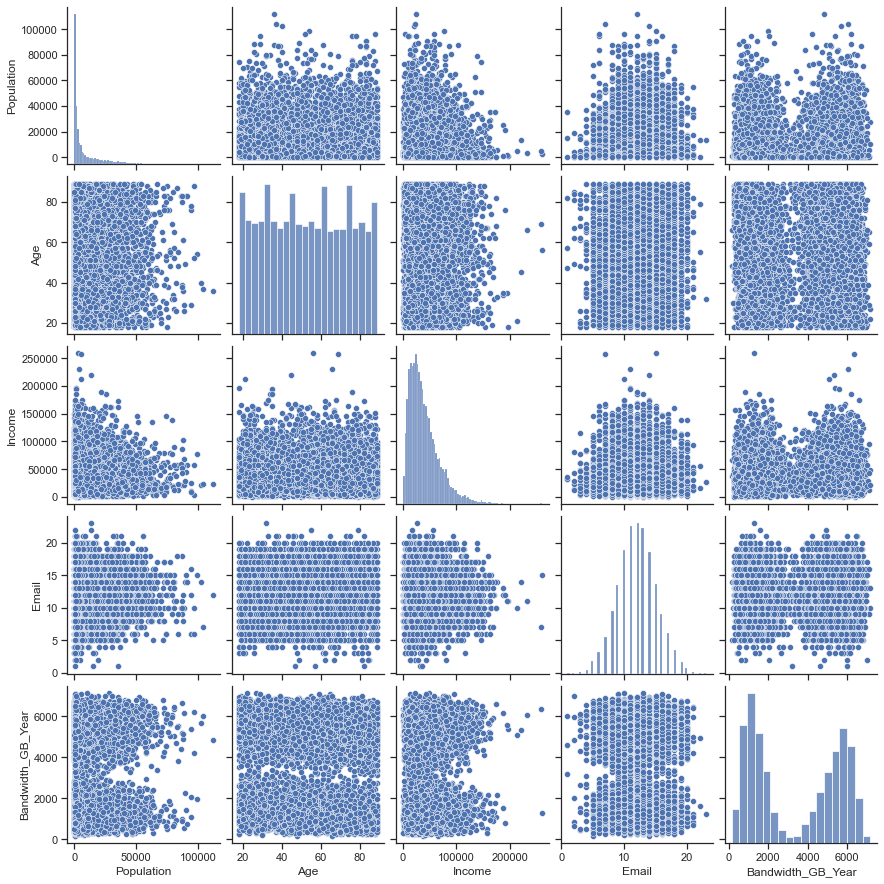

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df[["Population","Age","Income","Email","Bandwidth_GB_Year"]])

### Review Summary Statistics

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.00000
Children,10000.0,2.087700,2.147200,0.000000,0.000000,1.000000,3.000000,10.00000
Age,10000.0,53.078400,20.698882,18.000000,35.000000,53.000000,71.000000,89.00000
Income,10000.0,39806.926771,28199.916702,348.670000,19224.717500,33170.605000,53246.170000,258900.70000
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.00000
Yearly_equip_failure,10000.0,0.398000,0.635953,0.000000,0.000000,0.000000,1.000000,6.00000
Bandwidth_GB_Year,10000.0,3392.341550,2185.294852,155.506715,1236.470827,3279.536903,5586.141369,7158.98153
MaritalClass,10000.0,2.956700,1.413444,1.000000,2.000000,3.000000,4.000000,5.00000
GenderClass,10000.0,1.520600,0.543880,1.000000,1.000000,1.000000,2.000000,3.00000
InternetServiceClass,10000.0,1.772100,0.775772,1.000000,1.000000,2.000000,2.000000,3.00000


### Look for outliers and determine course of action

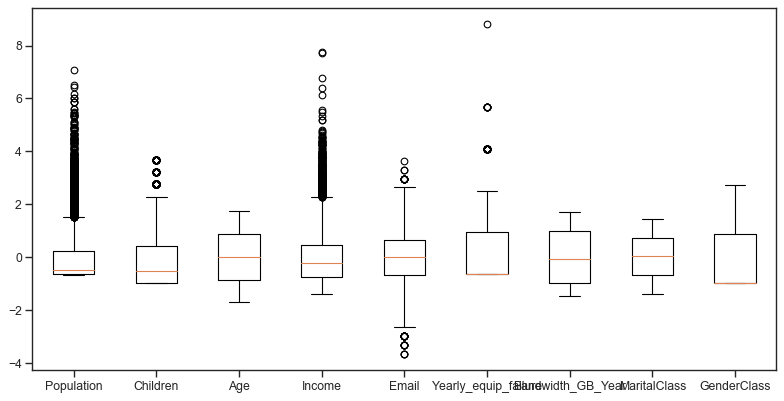

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

standardization = StandardScaler(with_mean=True, with_std=True)
Xs = standardization.fit_transform(df)
labels = df.columns
boxplot = plt.boxplot(Xs[:, 0:9], labels=labels[0:9])

The only variable with extreme outliers appears to be Yearly_equip_failure.  Since this variable would not be a key descriptor for new customers, we will remove it from the dataset and therefore avoid any possible issues due to its outliers.

In [16]:
df.drop(columns='Yearly_equip_failure', inplace=True)

### Normalization

Since there is a large variance on the min/max of variables, we will now normalize variables that go beyond the 0 to 1 range.

In [17]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,0.087229,0.129036,0.0,0.006598,0.026021,0.117729,1.0
Children,10000.0,0.208770,0.214720,0.0,0.000000,0.100000,0.300000,1.0
Age,10000.0,0.494062,0.291534,0.0,0.239437,0.492958,0.746479,1.0
Income,10000.0,0.152612,0.109069,0.0,0.073007,0.126945,0.204591,1.0
Email,10000.0,0.500727,0.137541,0.0,0.409091,0.500000,0.590909,1.0
Bandwidth_GB_Year,10000.0,0.462176,0.312030,0.0,0.154347,0.446069,0.775420,1.0
MaritalClass,10000.0,0.489175,0.353361,0.0,0.250000,0.500000,0.750000,1.0
GenderClass,10000.0,0.260300,0.271940,0.0,0.000000,0.000000,0.500000,1.0
InternetServiceClass,10000.0,0.386050,0.387886,0.0,0.000000,0.500000,0.500000,1.0
TechieClass,10000.0,0.832100,0.373796,0.0,1.000000,1.000000,1.000000,1.0


In [18]:
# Save the dataset for submission
df.to_csv('data/prepped_churn.csv')

### Initial check for correlation

Now we will create a heatmap to view correlation.

In [19]:
df.corr()

,Population,Children,Age,Income,Email,Bandwidth_GB_Year,MaritalClass,GenderClass,InternetServiceClass,TechieClass,...,TabletClass,PhoneClass,MultipleClass,OnlineSecurityClass,OnlineBackupClass,DeviceProtectionClass,TechSupportClass,StreamingTVClass,StreamingMoviesClass,PaperlessBillingClass
Population,1.000000,-0.005877,0.010538,-0.008639,0.017962,-0.003902,0.006903,-0.010659,-0.002849,0.011483,...,-0.001225,-0.008196,0.001241,-0.012549,-0.010352,0.003795,0.006606,0.006590,0.005882,-0.008656
Children,-0.005877,1.000000,-0.029732,0.009942,0.004479,0.025585,0.003822,0.006032,0.005876,0.006884,...,-0.001494,0.001629,0.021969,-0.006937,0.000297,-0.005477,-0.000878,0.007106,-0.003461,-0.006828
Age,0.010538,-0.029732,1.000000,-0.004091,0.001588,-0.014724,-0.006345,-0.005660,0.001194,0.007531,...,0.004384,-0.009521,0.004674,0.011213,-0.003309,-0.014489,-0.017155,0.000197,-0.010125,-0.002247
Income,-0.008639,0.009942,-0.004091,1.000000,-0.009267,0.003674,0.006896,-0.018436,0.010208,-0.005442,...,-0.005999,0.001677,0.000214,0.010385,0.005974,-0.014073,-0.008835,0.003324,0.002186,0.012049
Email,0.017962,0.004479,0.001588,-0.009267,1.000000,-0.014579,0.011643,0.007882,-0.002451,0.014047,...,0.008579,0.007281,0.002966,0.024908,0.011763,-0.001520,-0.022119,-0.005099,-0.000711,0.012632
Bandwidth_GB_Year,-0.003902,0.025585,-0.014724,0.003674,-0.014579,1.000000,0.007698,-0.001469,0.016050,0.009455,...,-0.002129,-0.001332,-0.006823,-0.021006,-0.041740,0.007856,-0.000120,-0.054314,-0.045600,0.002470
MaritalClass,0.006903,0.003822,-0.006345,0.006896,0.011643,0.007698,1.000000,-0.009052,-0.009639,0.004410,...,-0.004715,-0.005011,0.000493,0.011833,-0.007552,-0.001984,-0.007947,0.008431,0.005840,-0.015625
GenderClass,-0.010659,0.006032,-0.005660,-0.018436,0.007882,-0.001469,-0.009052,1.000000,0.005084,0.014801,...,0.007676,-0.003616,0.000710,-0.012021,-0.008195,-0.008022,0.006931,-0.017640,-0.005983,0.010898
InternetServiceClass,-0.002849,0.005876,0.001194,0.010208,-0.002451,0.016050,-0.009639,0.005084,1.000000,0.004261,...,-0.006377,-0.010358,0.018061,0.019104,0.002353,0.002710,-0.019338,-0.004724,0.002983,0.011654
TechieClass,0.011483,0.006884,0.007531,-0.005442,0.014047,0.009455,0.004410,0.014801,0.004261,1.000000,...,0.010992,-0.003081,-0.004661,-0.015300,0.004540,0.021346,0.007391,0.003436,-0.004298,0.001311


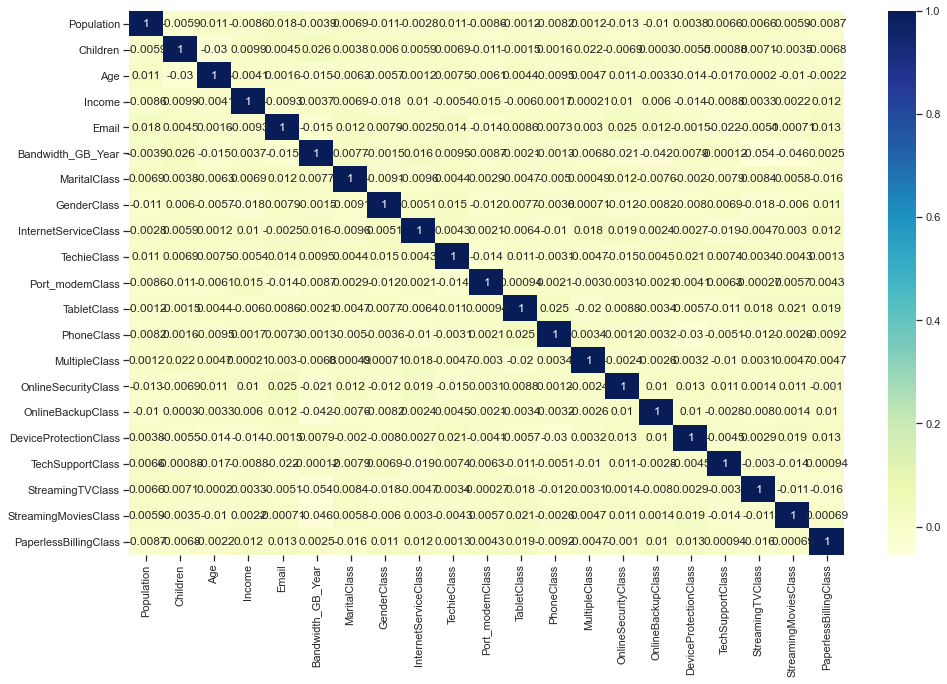

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

There appears to be very little correlation among variables.

---
## Model Creation

### Separate the dependent and independent variables

In [21]:
# Move the dependent variable to the end
cols = list(df)
cols.insert(0, cols.pop(cols.index('Bandwidth_GB_Year')))
df = df.loc[:, cols]

# Dependent (Target) Variable:
y = df['Bandwidth_GB_Year']
# Independent Variables:
X = df.iloc[:, 1:]
variables = X.columns

### Fit the data into a model

In [22]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.532
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           6.54e-11
Time:                        15:37:07   Log-Likelihood:                -2497.1
No. Observations:               10000   AIC:                             5036.
Df Residuals:                    9979   BIC:                             5188.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5202      0.020     25.795      0.000       0.481       0.560
Population               -0.0087      0.024     -0.362      0.718      -0.056       0.039
Children                  0.0367      0.014      2.530      0.011       0.008       0.065
Age                      -0.0152      0.011     -1.427      0.154      -0.036       0.006
Income                    0.0112      0.029      0.394      0.693      -0.045       0.067
Email                    -0.0322      0.023     -1.420      0.156      -0.077       0.012
MaritalClass              0.0075      0.009      0.850      0.395      -0.010       0.025
GenderClass              -0.0041      0.011     -0.359      0.719      -0.027       0.018
InternetServiceClass      0.0131      0.008      1.636      0.102      -0.003       0.029
TechieClass               0.0076      0.008      0.914      0.360      -0.009       0.024
Port_modemClass          -0.0053      0.006     -0.854      0.393      -0.018       0.007
TabletClass            6.387e-05      0.007      0.009      0.993      -0.013       0.013
PhoneClass               -0.0019      0.011     -0.181      0.857      -0.023       0.019
MultipleClass            -0.0046      0.006     -0.735      0.462      -0.017       0.008
OnlineSecurityClass      -0.0129      0.006     -1.986      0.047      -0.026      -0.000
OnlineBackupClass        -0.0264      0.006     -4.219      0.000      -0.039      -0.014
DeviceProtectionClass     0.0058      0.006      0.924      0.356      -0.007       0.018
TechSupportClass         -0.0006      0.006     -0.095      0.924      -0.013       0.012
StreamingTVClass         -0.0346      0.006     -5.559      0.000      -0.047      -0.022
StreamingMoviesClass     -0.0288      0.006     -4.629      0.000      -0.041      -0.017
PaperlessBillingClass     0.0013      0.006      0.208      0.835      -0.011       0.014
==============================================================================
Omnibus:                    42344.249   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.812
Skew:                           0.069   Prob(JB):                    1.81e-271
Kurtosis:                       1.276   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Findings: Our model does not seem to work very well based on the R2 of 0.009.

### Remove columns and try again
<br>We can use eigenvectors to detect high associated fields and remove them to lessen their impact on the model.

In [23]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)
print(eigenvalues)

[0.9186545  0.93204632 1.06669323 1.06359777 1.05405348 1.05275256
 1.04736495 0.94666042 1.0355902  0.95828003 0.9627079  1.0203008
 1.01480109 1.0049031  1.00265996 0.99561056 0.97416908 0.97715253
 0.98881531 0.98318619]


There aren't stark outliers, but the biggest outlier seems to be the first grouping (0.919).  We can now look at the values inside of it to determine what is causing it to shift.

In [24]:
print (eigenvectors[:,0])

[ 0.18163847 -0.04992078 -0.29495116 -0.16159492 -0.35418445 -0.10991424
 -0.00162073 -0.26413157  0.30304777  0.01922044 -0.11811569 -0.11905896
  0.08462459  0.45971953 -0.00512182 -0.33840414 -0.39593338 -0.01884499
 -0.0457646   0.17753006]


In [25]:
variables[13], variables[16]

('OnlineSecurityClass', 'TechSupportClass')

It is being driven by the columns at index 13 and 16.  These correspond to OnlineSecurityClass and TechSupportClass.  These will now be removed from the model.

In [26]:
variables[13], variables[16]

('OnlineSecurityClass', 'TechSupportClass')

Also, looking at the P major values, it appears as thought most variables are insignificant, with the exception of Children, OnlineSecurity, OnlineBackup, StreamingTV, and StreamingMovies.
<br><br>
We will now remove all but those 5 columns and create another model.

In [27]:
df.drop(columns=['Population', 'Age', 'Income', 'Email', 'MaritalClass', 'InternetServiceClass', 'TechieClass', 'Port_modemClass', 'TabletClass', 'GenderClass', 'PhoneClass', 'MultipleClass', 'DeviceProtectionClass', 'TechSupportClass', 'PaperlessBillingClass'], inplace=True)

### Create a revised model

In [28]:
# Dependent (Target) Variable:
y = df['Bandwidth_GB_Year']
# Independent Variables:
X = df.iloc[:, 1:]
variables = X.columns

In [29]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     15.95
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.10e-15
Time:                        15:37:15   Log-Likelihood:                -2502.6
No. Observations:               10000   AIC:                             5017.
Df Residuals:                    9994   BIC:                             5060.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5092      0.008     61.830      0.000       0.493       0.525
Children                 0.0373      0.014      2.579      0.010       0.009       0.066
OnlineSecurityClass     -0.0129      0.006     -1.990      0.047      -0.026      -0.000
OnlineBackupClass       -0.0263      0.006     -4.207      0.000      -0.039      -0.014
StreamingTVClass        -0.0345      0.006     -5.548      0.000      -0.047      -0.022
StreamingMoviesClass    -0.0286      0.006     -4.599      0.000      -0.041      -0.016
==============================================================================
Omnibus:                    42359.615   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.134
Skew:                           0.068   Prob(JB):                    2.54e-271
Kurtosis:                       1.276   Cond. No.                         7.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### An example of running the model with SKLearn

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  0.5092296100697045
Model coefficients:  [ 0.03733834 -0.0129101  -0.02628877 -0.03450453 -0.02860165]


---
## Results

Our **Adjusted R2 is very low at 0.007**, even after-fine tuning the dataset.  This would not be very helpful in predicting data usage.  Unfortunately, it is sometimes found that a model cannot be created to accurately predict target variables.  This can be due to a lack of relevant data points, unclean/incomplete data, or many other factors.
<br><br>
The calculation for our model is <br>
**y = 0.509 + 0.0373Children + -0.0129Security + -0.0263Backup + -0.0345TV + -0.0286Movies**

---
## Reference

### Theory
Model Assumptions - 
https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/

### Code Examples 

Multiple Linear Regression - https://www.kaggle.com/akdagmelih/multiplelinear-regression-fish-weight-estimation

Normalizing Variables - https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

Plot Sizing - https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib